# Regularised linear models for regression

## (Gaussian) Linear models for regression

The goal of regression is to predict the value of one or more continuous *target* variables $y$ given the value of a $p$-dimensional vector $\vec{x}$ of input variables [1]. 

$$
x_1, x_2, \dots, x_p \rightarrow y
$$

The simplest linear regression models share the property of being linear functions of the input parameters. If we call that function $f$, a model prediction $\hat{y}$ for a given value of the input vector $\vec{x}$ is given by 

$$
\hat{y} = f(x_1, x_2, \dots, x_p)
$$

The process of learning the function $f$ is what machine learning or statistical learning is about. We use a dataset D, made of $N$ labeled samples $(x_1, x_2, \dots, x_p, y)_{i=1..N}$, to estimate the function $f$. We will get a bit deeper into this subject in the following sections, in the context of cost functions and regularisation. But in principle, for each data point, we have that 


$$
y_i = f(\vec{x}_i) + \epsilon
$$

This is equivalent to say that for each sample, the target variable is given by a deterministic function (i.e. $f$) plus noise. Probably the most popular the most popular family of models comes from the assumption that the error $\epsilon$ is normally distributed (i.e. Gaussian), which is not a bad assumption in most real world scenarios thanks to the central limit theorem. That is equivalent to say that the input vector and output variable together make a multi-variate normal distribution $(x_1, x_2, \dots, x_p, y)$. If we take a probabilistic approach, we can describe each data point as:

$$
p(y_i | \vec{x}_i) \sim N(\mu_i, \sigma^2)
$$

that is, the target variable $y$ is normally distributed conditional to the values of $\vec{x}$ where 

$$
\mu_i = \beta_1 \Phi_1(\vec{x}_i) + \dots + \beta_r \Phi_r(\vec{x}_i)
$$

that is, we define the function $f$ (and the center of the distribution) in terms of a series of $r$ weights or coefficients $\vec{\beta}$ and selection functions $\vec{\Phi}$ that combine the values of the inputs to get the output. Finally, if we define for the whole dataset 

$$
Y = \begin{pmatrix}
y_1 \\ 
y_2 \\ 
\dots \\ 
y_N
\end{pmatrix}

\vec{\beta} = \begin{pmatrix}
\beta_1 \\ 
\beta_2 \\ 
\dots \\ 
\beta_r
\end{pmatrix}

X = \begin{pmatrix}
\Phi_1(\vec{x}_1) && \Phi_2(\vec{x}_1) && \dots && \Phi_r(\vec{x}_1) \\ 
\Phi_1(\vec{x}_2) && \Phi_2(\vec{x}_2) && \dots && \Phi_r(\vec{x}_2) \\ 
\dots && \dots && \dots && \dots \\
\Phi_1(\vec{x}_N) && \Phi_2(\vec{x}_N) && \dots && \Phi_r(\vec{x}_N) \\ 
\end{pmatrix}
$$ and 

we have that 

$$
Y = X \vec{\beta} + \epsilon
$$

or equivalently

$$
p(Y) \sim N(X \vec{\beta}, \sigma^2 I)
$$

The problem is then to estimate the coefficients vector $\vec{\beta}$. Two ways of estimate these values are *least squares estimation* and *maximum likelihood estimation*. Although the are equivalent for linear gaussian models, they do not have to be. We will focus on the first approach for the time being.

## Least Squares Estimation

The LSE method uses a cost function $S$, the residual sum of squares, which we aim to minimise:

$$
S(\vec{\beta}) = \sum_{i=1}^{N} (Y_i - \sum_{k=1}^{r} \beta_k \Phi_k(x_i))^2 = (Y - X\vec{\beta})^T(Y-X \vec{\beta})
$$

We sum, over all $N$ samples in out dataset, the squared difference between the actual value $Y_i$ and the prediction. Hence, our task is to find the vector of weights that minimises the resodual sum of squares:

$$
\vec{\hat{\beta}} = \underset{\vec{\beta}}{argmin} (Y - X\vec{\beta})^T(Y-X \vec{\beta})
$$

## A regularised cost function

One of the most important steps in the machine learning model is feature selection. During that step, we decide which elements of the input vector $\vec{x}$ are important and will be used to predict the target variable $y$. Not all elements of $\vec{x}$ are equally (or at all) important to predict the target variable. One principled and more continuous way of doing that is by penalising the cost function $C$ in a way that it keeps only the most important elements of $\vec{x}$. This process is called *regularisation* or *shrinkage*.

Remember that our task is to find the vector of weights that minimises the resodual sum of squares:

$$
\vec{\hat{\beta}} = \underset{\vec{\beta}}{argmin} (Y - X\vec{\beta})^T(Y-X \vec{\beta})
$$

we can add an new constraint to our minimisation task in the form of a limit to the $L_2$ norm of the weight vector, given by the scalar product $\vec{\beta}^T \vec{\beta}$:

$$
\vec{\hat{\beta}} = \underset{\vec{\beta}, \vec{\beta}^T \vec{\beta}}{argmin} (Y - X\vec{\beta})^T(Y-X \vec{\beta})
$$

that is, the new task is to find $\vec{\beta}$ that minimises the residual sum of squares subject to its $L_2$ also minimising it. To find the values of $\vec{\beta}$, we can put that into a *Lagrange multiplier* term:

$$
\vec{\hat{\beta}} = \underset{\vec{\beta}}{argmin} (Y - X\vec{\beta})^T(Y-X \vec{\beta}) + \lambda \vec{\beta}^T \vec{\beta}
$$

This is called *Ridge Regression*. The effect of the new constraint is that larger weights (in absolute terms due to the $L_2$ norm) will penalise the total cost. So in order to minimise $S$ we need to shring the weights. Also, in oder to also minimise the residual sum of squares, the weights that are more relevant to fit the model to the data, will tend to have bigger weights (as it happens without regularisation). The rest will be clsoer to zero.

In order to minimise our new cost function $S(\vec{\beta},\lambda)$ we differentiate and equal to zero:

$$
\begin{split}
0 &= \frac{d}{d \vec{\beta}} S(\vec{\beta},\lambda) \\
0 &= 2X^TX\vec{\beta} -2X^TY + 2\lambda \vec{\beta}\\
(X^TX+\lambda I)\vec{\beta} & = X^T Y
\end{split}
$$

which gives us the ridge coefficients $\vec{\beta}_R$

$$
\vec{\beta}_R = (X^TX + \lambda I)^{-1}X^TY
$$

The task is then to determine the amount of regularisation we need, represented by $\lambda$. We tipically do that by grid search across different values of $\lambda$ and using cross-validation. Hopefully, we won't need to do all that algebra by hand. Let's see how we can train a ridge regression model in Python.


#### Ridge regression in Python

Let's first load our TB new cases data into a Pandas dataframe.

In [142]:
import urllib
import pandas as pd

tb_new_url_csv = 'https://docs.google.com/spreadsheets/d/1Pl51PcEGlO9Hp4Uh0x2_QM0xVb53p2UDBMPwcnSjFTk/pub?gid=0&output=csv'
local_tb_new_file = 'tb_new_100.csv'
new_f = urllib.request.urlretrieve(tb_new_url_csv, local_tb_new_file)

new_df = pd.read_csv(local_tb_new_file, index_col = 0, thousands  = ',').T

In [143]:
new_df = new_df[new_df.columns[new_df.isna().sum()==0]]

We will try to predict the number of new cases in one country, `Algeria`, using information of the rest of the countries. That is, our target variable $y$ will be `Algeria`, and our vector of intpus $\vec{x}$ will be the rest of the countries. We will consider each year as a sample. We expect most of the countries not to be informative to predict the amount of new cases in `Algeria`, and we hope that *ridge regression* will minimise the coefficients for those. Notice that the number of columns is twenty times the number of rows, so this can be considered a high dimensional dataset in terms of the amount of samples we have. 

In [144]:
new_df.shape

(18, 207)

In [145]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

y = new_df['Algeria']
X = new_df[[c for c in new_df.columns if c not in ['Algeria']]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [146]:
ridge_model = Ridge().fit(X_train, y_train)

In [147]:
y_predicted = ridge_model.predict(X_test)

In [148]:
X_test

"TB incidence, all forms (per 100 000 population per year)",Afghanistan,Albania,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1990,168.0,25.0,21.0,36.0,205.0,24.0,10.0,60.0,33.0,7.0,...,28.0,68.0,139.0,35.0,202.0,63.0,35.0,133.0,297.0,329.0
1991,168.0,24.0,7.0,34.0,209.0,24.0,10.0,57.0,32.0,7.0,...,27.0,64.0,134.0,35.0,200.0,176.0,34.0,131.0,349.0,364.0
1998,168.0,28.0,6.0,25.0,240.0,23.0,7.0,44.0,63.0,6.0,...,25.0,85.0,105.0,34.0,187.0,54.0,28.0,106.0,583.0,580.0
1995,168.0,27.0,11.0,27.0,226.0,23.0,8.0,49.0,47.0,7.0,...,26.0,76.0,117.0,35.0,193.0,47.0,32.0,122.0,536.0,474.0
1993,168.0,26.0,9.0,30.0,218.0,24.0,9.0,53.0,37.0,7.0,...,27.0,73.0,125.0,35.0,196.0,87.0,33.0,127.0,460.0,417.0
2003,168.0,22.0,5.0,20.0,265.0,22.0,6.0,36.0,71.0,6.0,...,23.0,113.0,89.0,34.0,178.0,111.0,23.0,89.0,652.0,825.0


In [149]:
predictions_df = pd.DataFrame({
    'Actual new cases': y_test,
    'Ridge prediction': y_predicted
})

In [150]:
predictions_df

,Actual new cases,Ridge prediction
1990,38.0,39.228734
1991,38.0,39.089076
1998,46.0,45.205599
1995,42.0,41.625751
1993,40.0,39.586820
2003,51.0,52.012267


That is a remarkable result for the amount of data. Let's have a look at what features are the most important for the *ridge regression*. These will be the countries that are better predictors for the cases in `Algeria`.

First look at the top five predictors (both positively and negatively).

In [151]:
coef_abs_value = [abs(c) for c in ridge_model.coef_]
coefs_df = pd.DataFrame({
    'coef_abs_value': coef_abs_value,
    'coef_value': ridge_model.coef_,
    'country': X_train.columns
})
coefs_df.sort_values(by=['coef_abs_value'], ascending=False).head(5)

,coef_abs_value,coef_value,country
161,0.013899,0.013899,Sierra Leone
94,0.010280,0.010280,Kenya
67,0.008171,-0.008171,Gabon
53,0.006993,0.006993,Djibouti
21,0.006862,-0.006862,Bhutan


And then at the top less important ones.

In [152]:
coefs_df.sort_values(by=['coef_abs_value'], ascending=True).head(5)

,coef_abs_value,coef_value,country
0,0.0,0.0,Afghanistan
18,0.0,0.0,Belize
90,0.0,0.0,Jamaica
86,0.0,0.0,Iraq
12,0.0,0.0,Bahamas


Although the pattern is not perfect, we can see that the model is mostly based on countries closer to `Algeria`, and that the *ridge regression* process set to zero many countries that are farther away. 

### Finding the right amount of regularisation

In the previous, we have used Python's `Ridge` defaults. In this section we will use cross validation to compare different values of the regularisation strength. The simplest way to use cross-validation is to call the `cross_val_score` helper function on the estimator and the dataset. Once we have the values for each split, we can average them. We will repeat this operation for each value of the regularisation strength we want to explore. We could do that using `sklearn`'s `GridSearchCV`, but being a simple procedure, we will write the loop ourselves here for illustration purposes.

In [153]:
from sklearn.model_selection import cross_val_score
import numpy as np

grid_search_results = pd.DataFrame(columns=['reg_strength','MSE'])
for reg_strength in range(0,500):
    ridge_model = Ridge(alpha=reg_strength).fit(X_train, y_train)
    mse_scores = [-s for s in cross_val_score(ridge_model, X, y, cv=3, scoring='neg_mean_squared_error')]
    average_mse = np.array(mse_scores).mean()
    grid_search_results.loc[reg_strength] = [reg_strength, average_mse]

/Users/jadianes/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/jadianes/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/jadianes/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.41849e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/Users/jadianes/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


We can now visualise the results. We can see how the model MSE value has a minimum at `134` after which it starts increasing.

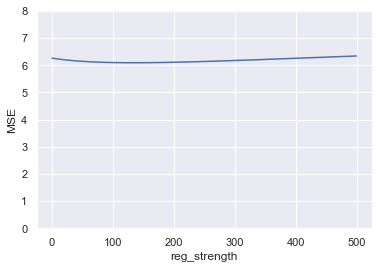

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

g = sns.lineplot(x='reg_strength', y='MSE', data=grid_search_results)
g.set(ylim=(0,8));

In [158]:
best_reg_strength = grid_search_results.sort_values(by='MSE').head(1).reg_strength
best_reg_strength

134    134.0
Name: reg_strength, dtype: float64

We can now use the best value to re-train the model and predict the test set again.

In [154]:
best_ridge_model = Ridge(best_reg_strength).fit(X_train, y_train)
best_y_predicted = best_ridge_model.predict(X_test)
predictions_df ['Ridge prediction (best model)'] = best_y_predicted


In [155]:
predictions_df

,Actual new cases,Ridge prediction,Ridge prediction (best model)
1990,38.0,39.228734,39.153761
1991,38.0,39.089076,39.060778
1998,46.0,45.205599,45.213222
1995,42.0,41.625751,41.798664
1993,40.0,39.586820,39.700666
2003,51.0,52.012267,51.919899


We can see that the improvement happens also with the test set. It is not a huge, but it is there. Also there are some changes in the coefficients for the countries, where the last one has been replaced for a closer one geographically.

In [156]:
coef_abs_value = [abs(c) for c in best_ridge_model.coef_]
coefs_df = pd.DataFrame({
    'coef_abs_value': coef_abs_value,
    'coef_value': best_ridge_model.coef_,
    'country': X_train.columns
})
coefs_df.sort_values(by=['coef_abs_value'], ascending=False).head(5)

,coef_abs_value,coef_value,country
161,0.012927,0.012927,Sierra Leone
94,0.008368,0.008368,Kenya
21,0.006653,-0.006653,Bhutan
53,0.006641,0.006641,Djibouti
101,0.006242,0.006242,Lesotho


## The *Lasso* 

The *lasso* (least absolute shrinkage and selection operator) method is similar to ridge regression, in which it penalises the cost function. However, instead of using the $L_2$ norm, it uses the $L_1$ norm. The optimisation problem now becomes:

$$
\vec{\hat{\beta}} = \underset{\vec{\beta}, \sum_{j} |\vec{\beta_j}| \le \tau}{argmin} (Y - X\vec{\beta})^T(Y-X \vec{\beta})
$$

that is, the new task is to find $\vec{\beta}$ that minimises the residual sum of squares subject to its $L_1$ also minimising it. To find the values of $\vec{\beta}$, we can put that into a *Lagrange multiplier* term:

$$
\vec{\hat{\beta}} = \underset{\vec{\beta}}{argmin} (Y - X\vec{\beta})^T(Y-X \vec{\beta}) + \lambda \sum_{j} |\vec{\beta_j}|
$$

In this case, we don't have an analytic solution, and we need to use a numerical one (implemented by Python's `sklearn`).

### The *Lasso* in Python

We will go straight into using grid search cross validation to find the optimal regulsarisation amount.

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

clf = GridSearchCV(
    estimator=Lasso(),
    cv=3,
    scoring='neg_mean_squared_error',
    param_grid={'alpha':range(0,500)})
clf.fit(X_train, y_train)


/Users/jadianes/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/jadianes/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/jadianes/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/jadianes/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disc

GridSearchCV(cv=3, estimator=Lasso(), param_grid={'alpha': range(0, 500)},
             scoring='neg_mean_squared_error')

In [163]:
best_lasso_model = clf.best_estimator_
best_lasso_y_predicted = best_lasso_model.predict(X_test)
predictions_df ['Lasso prediction (best model)'] = best_lasso_y_predicted

In [164]:
predictions_df

,Actual new cases,Ridge prediction,Ridge prediction (best model),ElasticNet prediction (best model),Lasso prediction (best model)
1990,38.0,39.228734,39.153761,37.955345,37.839855
1991,38.0,39.089076,39.060778,38.496087,38.372519
1998,46.0,45.205599,45.213222,45.284684,45.315481
1995,42.0,41.625751,41.798664,41.834718,41.842920
1993,40.0,39.586820,39.700666,39.949414,39.903718
2003,51.0,52.012267,51.919899,51.765331,51.745462


In [165]:
lasso_coef_abs_value = [abs(c) for c in best_lasso_model.coef_]
lasso_coefs_df = pd.DataFrame({
    'coef_abs_value': lasso_coef_abs_value,
    'coef_value': best_lasso_model.coef_,
    'country': X_train.columns
})
lasso_coefs_df.sort_values(by=['coef_abs_value'], ascending=False).head(5)

,coef_abs_value,coef_value,country
161,0.041148,0.041148,Sierra Leone
101,0.008167,0.008167,Lesotho
123,0.002216,-0.002216,Nauru
132,0.001237,-0.001237,Niue
201,0.000122,-0.000122,Wallis et Futuna


We can see a defining characteristic of *lasso*, and it's sparsity. The coefficient values decay faster.

## The best of both worlds: ElasticNet

### ElasticNet in Python

In [166]:
from sklearn.linear_model import ElasticNetCV

best_en_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=3).fit(X_train, y_train)

best_en_y_predicted = best_en_model.predict(X_test)
predictions_df['ElasticNet prediction (best model)'] = best_en_y_predicted


In [167]:
predictions_df

,Actual new cases,Ridge prediction,Ridge prediction (best model),ElasticNet prediction (best model),Lasso prediction (best model)
1990,38.0,39.228734,39.153761,37.955345,37.839855
1991,38.0,39.089076,39.060778,38.496087,38.372519
1998,46.0,45.205599,45.213222,45.284684,45.315481
1995,42.0,41.625751,41.798664,41.834718,41.842920
1993,40.0,39.586820,39.700666,39.949414,39.903718
2003,51.0,52.012267,51.919899,51.765331,51.745462


## References

1. Bishop. *Pattern recognition and machine learning*. 2006
2. Hastie. *The Elements of Statistical Learning*. 2nd Ed. 